In [1]:
from cuota.data_classes.spanish_tax_rules import SpanishAutonomoModel, SpanishRegimenGeneralModel

In [2]:
aut = SpanishAutonomoModel(year=2025)

In [3]:
gen = SpanishRegimenGeneralModel(year=2025)

In [4]:
gen.results(40000)

{'Régimen General': 2540,
 'Income Tax': 7753,
 'total payable': 10293,
 'take home': 29707,
 'effective rate': 0.257325}

In [5]:
import numpy as np

In [6]:
arr = np.linspace(10000, 80000, 1000).astype(int)

In [7]:
sample = gen.sample(taxable_array=arr)

In [8]:
cols = gen.df_cols()

In [9]:
import matplotlib.pyplot as plt

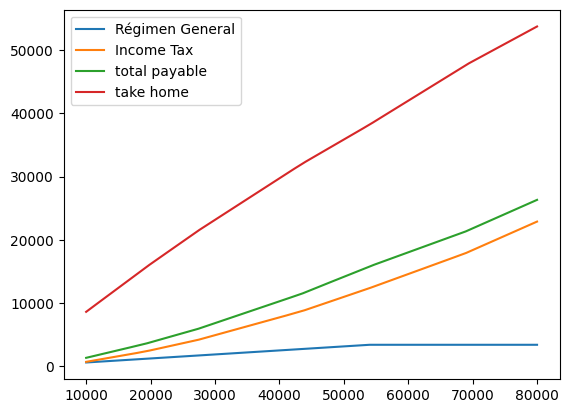

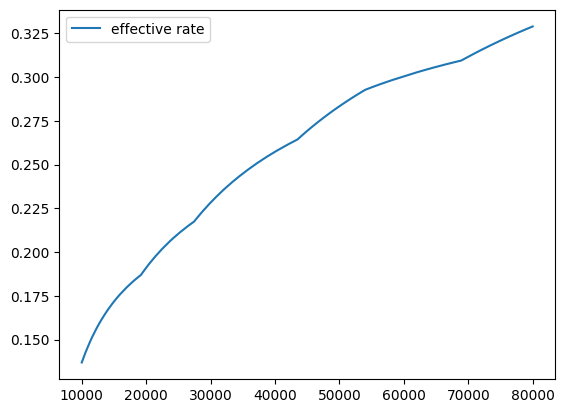

In [10]:
for col_list in cols:
    for col in col_list:
        plt.plot(arr, sample[col], label=col)
    plt.legend()
    plt.show()

In [11]:
def plot_sample(model):
    cols = model.df_cols()
    sample = model.sample(arr)
    for col_list in cols:
        for col in col_list:
            plt.plot(arr, sample[col], label=col)
        plt.legend()
        plt.show()


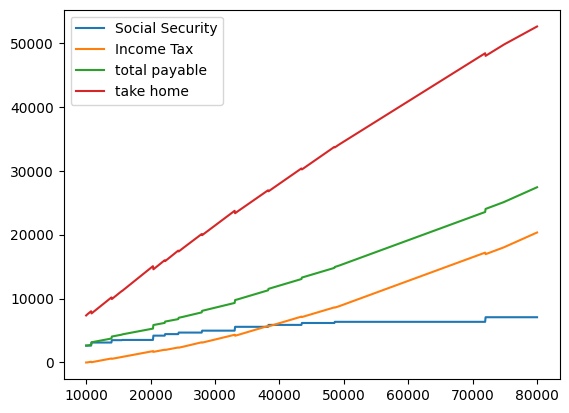

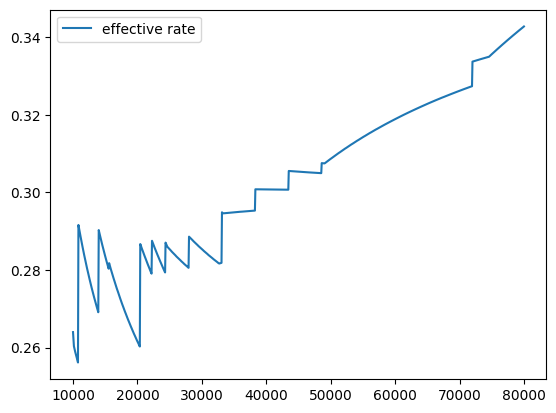

In [12]:
plot_sample(aut)

In [13]:
aut.df_cols()

(['Social Security', 'Income Tax', 'total payable', 'take home'],
 ['effective rate'])

In [14]:
aut.results(20000)

{'Social Security': 3528,
 'Income Tax': 1704,
 'total payable': 5232,
 'take home': 14768,
 'effective rate': 0.2616}

In [15]:
df = aut.sample(taxable_array=arr)
df.head()

,Social Security,Income Tax,total payable,take home,effective rate
10000,2640,0,2640,7360,0.264000
10070,2640,0,2640,7430,0.262165
10140,2640,0,2640,7500,0.260355
10210,2640,13,2653,7557,0.259843
10280,2640,26,2666,7614,0.259339


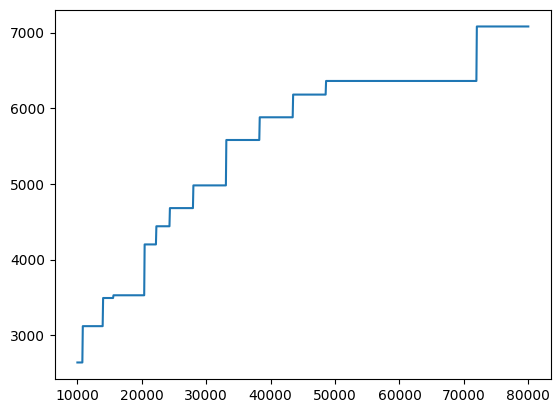

In [16]:
plt.plot(arr, df["Social Security"])

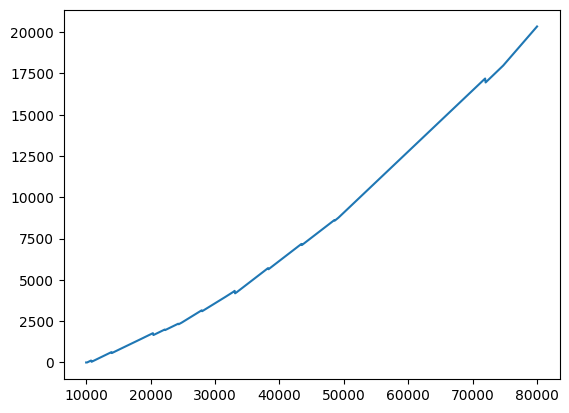

In [17]:
plt.plot(arr, df["Income Tax"])

In [18]:
aut.results(80000)

{'Social Security': 7080,
 'Income Tax': 20340,
 'total payable': 27420,
 'take home': 52580,
 'effective rate': 0.34275}

In [19]:
gen.results(72920)

{'Régimen General': 3429,
 'Income Tax': 19696,
 'total payable': 23125,
 'take home': 49795,
 'effective rate': 0.317128359846407}

In [20]:
from cuota.data_classes.spanish_tax_rules import SpanishAutonomoAllowance as SAA

In [21]:
SAA().function(taxable=100000000)

7500

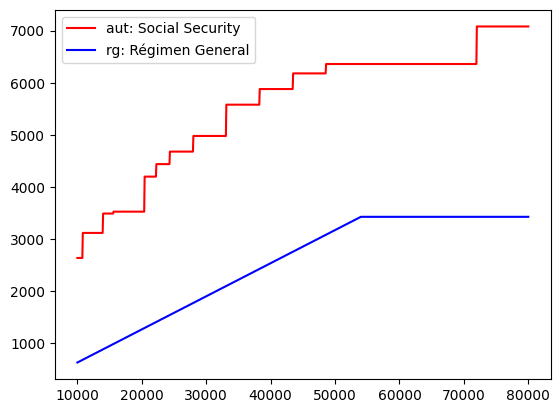

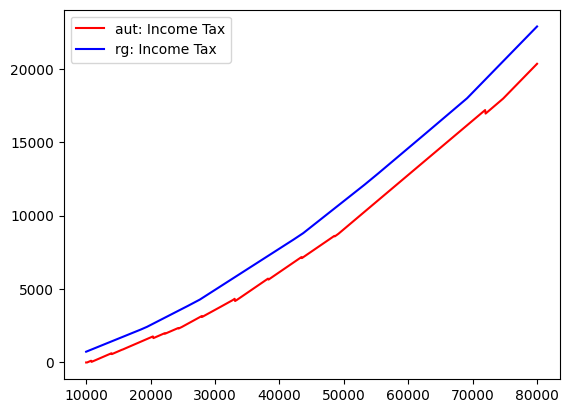

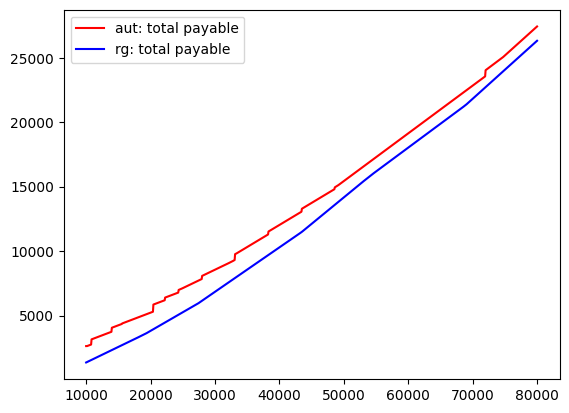

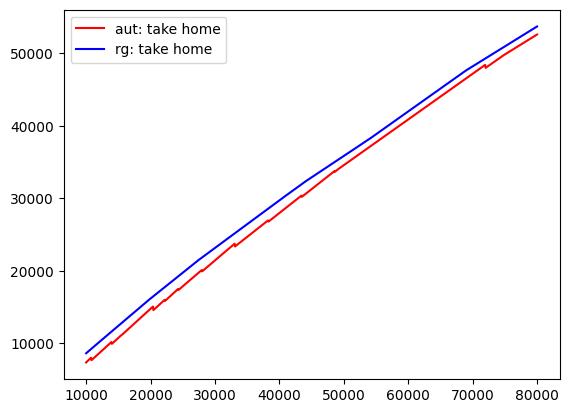

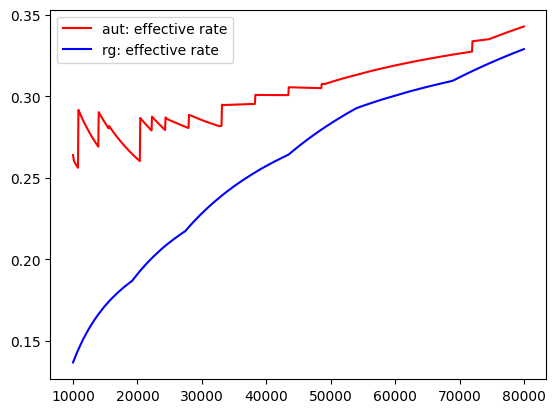

In [22]:
for metric1, metric2 in zip(sum(aut.df_cols(), []), sum(gen.df_cols(), [])):
    plt.plot(arr, aut.sample(taxable_array=arr)[metric1], color="red", label=f"aut: {metric1}")
    plt.plot(arr, gen.sample(taxable_array=arr)[metric2], color="blue", label=f"rg: {metric2}")
    plt.legend()
    plt.show()

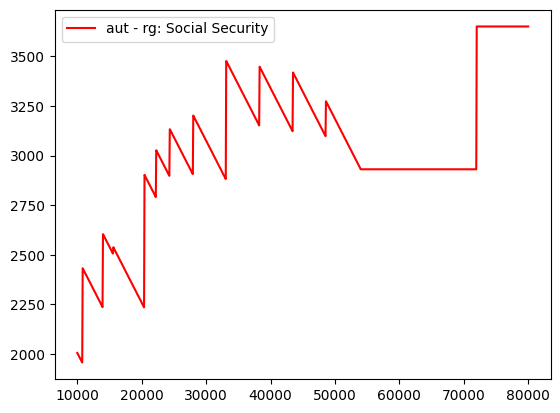

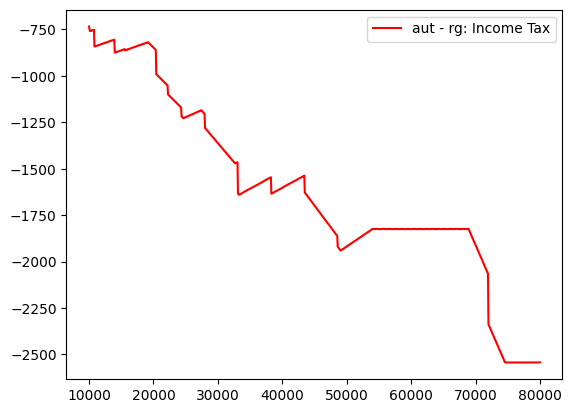

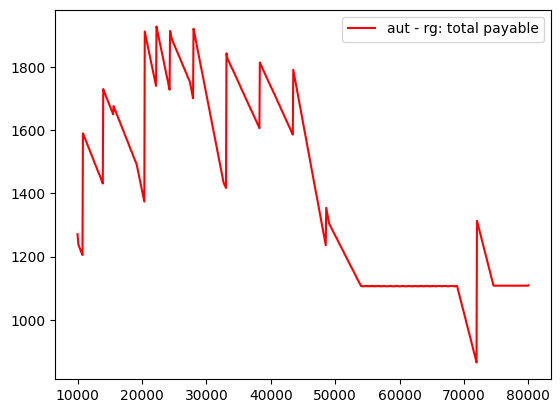

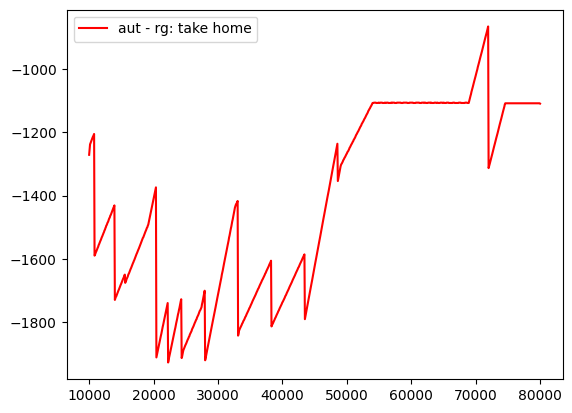

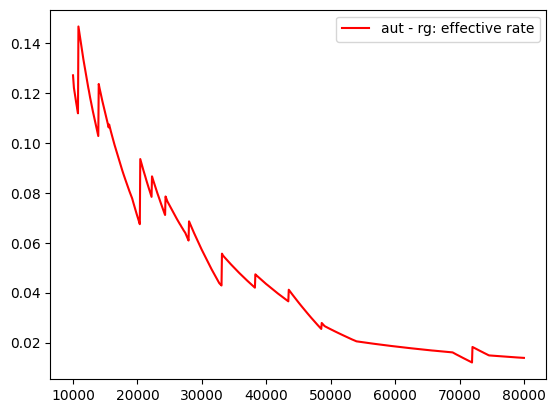

In [23]:
for metric1, metric2 in zip(sum(aut.df_cols(), []), sum(gen.df_cols(), [])):
    plt.plot(arr, aut.sample(taxable_array=arr)[metric1] - gen.sample(taxable_array=arr)[metric2], color="red", label=f"aut - rg: {metric1}")
    plt.legend()
    plt.show()